## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 48.8ms	remaining: 48.8s
1:	learn: 0.9301086	total: 50.8ms	remaining: 25.4s
2:	learn: 0.9005637	total: 52.7ms	remaining: 17.5s
3:	learn: 0.8720983	total: 54.8ms	remaining: 13.6s
4:	learn: 0.8467410	total: 56.7ms	remaining: 11.3s
5:	learn: 0.8226672	total: 58.5ms	remaining: 9.7s
6:	learn: 0.7994702	total: 60.4ms	remaining: 8.56s
7:	learn: 0.7784272	total: 62.2ms	remaining: 7.71s
8:	learn: 0.7602192	total: 64.1ms	remaining: 7.05s
9:	learn: 0.7412421	total: 66.2ms	remaining: 6.55s
10:	learn: 0.7247930	total: 68.3ms	remaining: 6.14s
11:	learn: 0.7089951	total: 70.1ms	remaining: 5.77s
12:	learn: 0.6951345	total: 71.9ms	remaining: 5.46s
13:	learn: 0.6809276	total: 73.7ms	remaining: 5.19s
14:	learn: 0.6692630	total: 75.6ms	remaining: 4.96s
15:	learn: 0.6588323	total: 77.4ms	remaining: 4.76s
16:	learn: 0.6472700	total: 79.2ms	remaining: 4.58s
17:	learn: 0.6379982	total: 81ms	remaining: 4.42s
18:	learn: 0.6294674	total: 83ms	remaining: 4.29s
19:	learn: 0.6193295	total:

55:	learn: 0.4881884	total: 153ms	remaining: 2.58s
56:	learn: 0.4861566	total: 155ms	remaining: 2.57s
57:	learn: 0.4850201	total: 157ms	remaining: 2.55s
58:	learn: 0.4840055	total: 159ms	remaining: 2.54s
59:	learn: 0.4824455	total: 161ms	remaining: 2.52s
60:	learn: 0.4809744	total: 163ms	remaining: 2.5s
61:	learn: 0.4801376	total: 165ms	remaining: 2.49s
62:	learn: 0.4792422	total: 167ms	remaining: 2.48s
63:	learn: 0.4780719	total: 168ms	remaining: 2.46s
64:	learn: 0.4771984	total: 170ms	remaining: 2.45s
65:	learn: 0.4759610	total: 172ms	remaining: 2.44s
66:	learn: 0.4750287	total: 174ms	remaining: 2.42s
67:	learn: 0.4740093	total: 176ms	remaining: 2.41s
68:	learn: 0.4732612	total: 178ms	remaining: 2.4s
69:	learn: 0.4727266	total: 180ms	remaining: 2.38s
70:	learn: 0.4716549	total: 182ms	remaining: 2.38s
71:	learn: 0.4709088	total: 184ms	remaining: 2.37s
72:	learn: 0.4697594	total: 185ms	remaining: 2.35s
73:	learn: 0.4690934	total: 187ms	remaining: 2.34s
74:	learn: 0.4680942	total: 189ms

88:	learn: 0.4572657	total: 217ms	remaining: 2.22s
89:	learn: 0.4569360	total: 219ms	remaining: 2.21s
90:	learn: 0.4559969	total: 221ms	remaining: 2.2s
91:	learn: 0.4549716	total: 222ms	remaining: 2.19s
92:	learn: 0.4544919	total: 224ms	remaining: 2.19s
93:	learn: 0.4537693	total: 226ms	remaining: 2.18s
94:	learn: 0.4532673	total: 228ms	remaining: 2.17s
95:	learn: 0.4526987	total: 230ms	remaining: 2.16s
96:	learn: 0.4520952	total: 232ms	remaining: 2.16s
97:	learn: 0.4513919	total: 233ms	remaining: 2.15s
98:	learn: 0.4503747	total: 235ms	remaining: 2.14s
99:	learn: 0.4494783	total: 237ms	remaining: 2.13s
100:	learn: 0.4487329	total: 240ms	remaining: 2.13s
101:	learn: 0.4481325	total: 241ms	remaining: 2.13s
102:	learn: 0.4475445	total: 243ms	remaining: 2.12s
103:	learn: 0.4466014	total: 245ms	remaining: 2.11s
104:	learn: 0.4461730	total: 247ms	remaining: 2.1s
105:	learn: 0.4457259	total: 249ms	remaining: 2.1s
106:	learn: 0.4451085	total: 251ms	remaining: 2.09s
107:	learn: 0.4447909	total

143:	learn: 0.4277528	total: 322ms	remaining: 1.92s
144:	learn: 0.4274087	total: 324ms	remaining: 1.91s
145:	learn: 0.4271984	total: 326ms	remaining: 1.91s
146:	learn: 0.4268458	total: 328ms	remaining: 1.9s
147:	learn: 0.4264987	total: 330ms	remaining: 1.9s
148:	learn: 0.4262192	total: 332ms	remaining: 1.9s
149:	learn: 0.4257966	total: 334ms	remaining: 1.89s
150:	learn: 0.4253062	total: 336ms	remaining: 1.89s
151:	learn: 0.4247446	total: 337ms	remaining: 1.88s
152:	learn: 0.4237365	total: 339ms	remaining: 1.88s
153:	learn: 0.4233079	total: 341ms	remaining: 1.87s
154:	learn: 0.4228876	total: 343ms	remaining: 1.87s
155:	learn: 0.4225404	total: 345ms	remaining: 1.86s
156:	learn: 0.4222831	total: 347ms	remaining: 1.86s
157:	learn: 0.4218088	total: 349ms	remaining: 1.86s
158:	learn: 0.4213239	total: 350ms	remaining: 1.85s
159:	learn: 0.4210022	total: 352ms	remaining: 1.85s
160:	learn: 0.4201256	total: 354ms	remaining: 1.85s
161:	learn: 0.4197073	total: 356ms	remaining: 1.84s
162:	learn: 0.4

176:	learn: 0.4136755	total: 385ms	remaining: 1.79s
177:	learn: 0.4133860	total: 387ms	remaining: 1.79s
178:	learn: 0.4129780	total: 389ms	remaining: 1.78s
179:	learn: 0.4122907	total: 390ms	remaining: 1.78s
180:	learn: 0.4119188	total: 392ms	remaining: 1.77s
181:	learn: 0.4115412	total: 394ms	remaining: 1.77s
182:	learn: 0.4112620	total: 396ms	remaining: 1.77s
183:	learn: 0.4107734	total: 398ms	remaining: 1.76s
184:	learn: 0.4104881	total: 400ms	remaining: 1.76s
185:	learn: 0.4100009	total: 402ms	remaining: 1.76s
186:	learn: 0.4096453	total: 404ms	remaining: 1.75s
187:	learn: 0.4093395	total: 405ms	remaining: 1.75s
188:	learn: 0.4090020	total: 407ms	remaining: 1.75s
189:	learn: 0.4085981	total: 409ms	remaining: 1.74s
190:	learn: 0.4082397	total: 411ms	remaining: 1.74s
191:	learn: 0.4079846	total: 413ms	remaining: 1.74s
192:	learn: 0.4076364	total: 415ms	remaining: 1.74s
193:	learn: 0.4069970	total: 417ms	remaining: 1.73s
194:	learn: 0.4066685	total: 419ms	remaining: 1.73s
195:	learn: 

231:	learn: 0.3954162	total: 491ms	remaining: 1.62s
232:	learn: 0.3951665	total: 493ms	remaining: 1.62s
233:	learn: 0.3949269	total: 494ms	remaining: 1.62s
234:	learn: 0.3945894	total: 497ms	remaining: 1.62s
235:	learn: 0.3944181	total: 498ms	remaining: 1.61s
236:	learn: 0.3941497	total: 500ms	remaining: 1.61s
237:	learn: 0.3939819	total: 502ms	remaining: 1.61s
238:	learn: 0.3938322	total: 504ms	remaining: 1.6s
239:	learn: 0.3935463	total: 506ms	remaining: 1.6s
240:	learn: 0.3933166	total: 507ms	remaining: 1.6s
241:	learn: 0.3930992	total: 509ms	remaining: 1.59s
242:	learn: 0.3928898	total: 511ms	remaining: 1.59s
243:	learn: 0.3926199	total: 513ms	remaining: 1.59s
244:	learn: 0.3923955	total: 515ms	remaining: 1.59s
245:	learn: 0.3922312	total: 517ms	remaining: 1.58s
246:	learn: 0.3919499	total: 519ms	remaining: 1.58s
247:	learn: 0.3917420	total: 521ms	remaining: 1.58s
248:	learn: 0.3915186	total: 523ms	remaining: 1.58s
249:	learn: 0.3912759	total: 524ms	remaining: 1.57s
250:	learn: 0.3

263:	learn: 0.3879324	total: 553ms	remaining: 1.54s
264:	learn: 0.3876861	total: 555ms	remaining: 1.54s
265:	learn: 0.3874255	total: 556ms	remaining: 1.53s
266:	learn: 0.3868515	total: 558ms	remaining: 1.53s
267:	learn: 0.3866114	total: 560ms	remaining: 1.53s
268:	learn: 0.3863119	total: 563ms	remaining: 1.53s
269:	learn: 0.3860579	total: 565ms	remaining: 1.53s
270:	learn: 0.3858830	total: 568ms	remaining: 1.53s
271:	learn: 0.3857050	total: 570ms	remaining: 1.52s
272:	learn: 0.3855021	total: 572ms	remaining: 1.52s
273:	learn: 0.3852614	total: 574ms	remaining: 1.52s
274:	learn: 0.3851459	total: 575ms	remaining: 1.52s
275:	learn: 0.3849180	total: 577ms	remaining: 1.51s
276:	learn: 0.3846590	total: 579ms	remaining: 1.51s
277:	learn: 0.3844409	total: 581ms	remaining: 1.51s
278:	learn: 0.3842433	total: 583ms	remaining: 1.51s
279:	learn: 0.3840246	total: 585ms	remaining: 1.5s
280:	learn: 0.3839018	total: 587ms	remaining: 1.5s
281:	learn: 0.3836780	total: 588ms	remaining: 1.5s
282:	learn: 0.3

317:	learn: 0.3762751	total: 657ms	remaining: 1.41s
318:	learn: 0.3761284	total: 659ms	remaining: 1.41s
319:	learn: 0.3760168	total: 661ms	remaining: 1.41s
320:	learn: 0.3757763	total: 663ms	remaining: 1.4s
321:	learn: 0.3756076	total: 665ms	remaining: 1.4s
322:	learn: 0.3754123	total: 667ms	remaining: 1.4s
323:	learn: 0.3751852	total: 669ms	remaining: 1.4s
324:	learn: 0.3750004	total: 671ms	remaining: 1.39s
325:	learn: 0.3749086	total: 672ms	remaining: 1.39s
326:	learn: 0.3746654	total: 674ms	remaining: 1.39s
327:	learn: 0.3745405	total: 676ms	remaining: 1.39s
328:	learn: 0.3743710	total: 678ms	remaining: 1.38s
329:	learn: 0.3741679	total: 680ms	remaining: 1.38s
330:	learn: 0.3738646	total: 682ms	remaining: 1.38s
331:	learn: 0.3736647	total: 684ms	remaining: 1.38s
332:	learn: 0.3733429	total: 686ms	remaining: 1.37s
333:	learn: 0.3732059	total: 688ms	remaining: 1.37s
334:	learn: 0.3730574	total: 690ms	remaining: 1.37s
335:	learn: 0.3728663	total: 691ms	remaining: 1.37s
336:	learn: 0.37

349:	learn: 0.3701923	total: 719ms	remaining: 1.33s
350:	learn: 0.3700067	total: 721ms	remaining: 1.33s
351:	learn: 0.3698930	total: 722ms	remaining: 1.33s
352:	learn: 0.3697314	total: 724ms	remaining: 1.33s
353:	learn: 0.3695617	total: 726ms	remaining: 1.32s
354:	learn: 0.3694397	total: 728ms	remaining: 1.32s
355:	learn: 0.3692589	total: 730ms	remaining: 1.32s
356:	learn: 0.3691107	total: 732ms	remaining: 1.32s
357:	learn: 0.3689645	total: 734ms	remaining: 1.31s
358:	learn: 0.3687886	total: 736ms	remaining: 1.31s
359:	learn: 0.3686485	total: 737ms	remaining: 1.31s
360:	learn: 0.3685749	total: 740ms	remaining: 1.31s
361:	learn: 0.3683909	total: 742ms	remaining: 1.31s
362:	learn: 0.3682710	total: 744ms	remaining: 1.3s
363:	learn: 0.3681254	total: 745ms	remaining: 1.3s
364:	learn: 0.3679761	total: 747ms	remaining: 1.3s
365:	learn: 0.3677932	total: 749ms	remaining: 1.3s
366:	learn: 0.3676022	total: 751ms	remaining: 1.29s
367:	learn: 0.3674148	total: 753ms	remaining: 1.29s
368:	learn: 0.36

403:	learn: 0.3616747	total: 823ms	remaining: 1.21s
404:	learn: 0.3614255	total: 826ms	remaining: 1.21s
405:	learn: 0.3613607	total: 828ms	remaining: 1.21s
406:	learn: 0.3612875	total: 830ms	remaining: 1.21s
407:	learn: 0.3611516	total: 832ms	remaining: 1.21s
408:	learn: 0.3609621	total: 834ms	remaining: 1.2s
409:	learn: 0.3608193	total: 836ms	remaining: 1.2s
410:	learn: 0.3604920	total: 838ms	remaining: 1.2s
411:	learn: 0.3603038	total: 840ms	remaining: 1.2s
412:	learn: 0.3602055	total: 842ms	remaining: 1.2s
413:	learn: 0.3599094	total: 844ms	remaining: 1.19s
414:	learn: 0.3597887	total: 846ms	remaining: 1.19s
415:	learn: 0.3595791	total: 848ms	remaining: 1.19s
416:	learn: 0.3594487	total: 850ms	remaining: 1.19s
417:	learn: 0.3592759	total: 852ms	remaining: 1.19s
418:	learn: 0.3591088	total: 854ms	remaining: 1.18s
419:	learn: 0.3589470	total: 856ms	remaining: 1.18s
420:	learn: 0.3587972	total: 858ms	remaining: 1.18s
421:	learn: 0.3586831	total: 860ms	remaining: 1.18s
422:	learn: 0.358

433:	learn: 0.3571859	total: 883ms	remaining: 1.15s
434:	learn: 0.3570185	total: 885ms	remaining: 1.15s
435:	learn: 0.3568416	total: 887ms	remaining: 1.15s
436:	learn: 0.3566846	total: 889ms	remaining: 1.15s
437:	learn: 0.3565875	total: 891ms	remaining: 1.14s
438:	learn: 0.3564768	total: 892ms	remaining: 1.14s
439:	learn: 0.3563559	total: 894ms	remaining: 1.14s
440:	learn: 0.3561557	total: 896ms	remaining: 1.14s
441:	learn: 0.3559793	total: 898ms	remaining: 1.13s
442:	learn: 0.3558695	total: 900ms	remaining: 1.13s
443:	learn: 0.3557039	total: 902ms	remaining: 1.13s
444:	learn: 0.3555934	total: 904ms	remaining: 1.13s
445:	learn: 0.3553700	total: 906ms	remaining: 1.13s
446:	learn: 0.3553048	total: 908ms	remaining: 1.12s
447:	learn: 0.3550824	total: 910ms	remaining: 1.12s
448:	learn: 0.3549146	total: 912ms	remaining: 1.12s
449:	learn: 0.3548607	total: 913ms	remaining: 1.12s
450:	learn: 0.3546809	total: 915ms	remaining: 1.11s
451:	learn: 0.3545787	total: 917ms	remaining: 1.11s
452:	learn: 

488:	learn: 0.3493200	total: 989ms	remaining: 1.03s
489:	learn: 0.3491550	total: 991ms	remaining: 1.03s
490:	learn: 0.3490323	total: 993ms	remaining: 1.03s
491:	learn: 0.3488767	total: 994ms	remaining: 1.03s
492:	learn: 0.3487285	total: 996ms	remaining: 1.02s
493:	learn: 0.3486318	total: 998ms	remaining: 1.02s
494:	learn: 0.3485016	total: 1s	remaining: 1.02s
495:	learn: 0.3484072	total: 1s	remaining: 1.02s
496:	learn: 0.3482698	total: 1s	remaining: 1.02s
497:	learn: 0.3481630	total: 1s	remaining: 1.01s
498:	learn: 0.3480855	total: 1.01s	remaining: 1.01s
499:	learn: 0.3478655	total: 1.01s	remaining: 1.01s
500:	learn: 0.3477966	total: 1.01s	remaining: 1.01s
501:	learn: 0.3476142	total: 1.01s	remaining: 1s
502:	learn: 0.3474667	total: 1.01s	remaining: 1s
503:	learn: 0.3473844	total: 1.02s	remaining: 1s
504:	learn: 0.3471852	total: 1.02s	remaining: 999ms
505:	learn: 0.3471124	total: 1.02s	remaining: 997ms
506:	learn: 0.3469987	total: 1.02s	remaining: 994ms
507:	learn: 0.3469000	total: 1.02

519:	learn: 0.3453867	total: 1.05s	remaining: 967ms
520:	learn: 0.3453067	total: 1.05s	remaining: 965ms
521:	learn: 0.3451017	total: 1.05s	remaining: 963ms
522:	learn: 0.3449560	total: 1.05s	remaining: 961ms
523:	learn: 0.3448379	total: 1.05s	remaining: 958ms
524:	learn: 0.3447174	total: 1.06s	remaining: 956ms
525:	learn: 0.3446114	total: 1.06s	remaining: 954ms
526:	learn: 0.3444940	total: 1.06s	remaining: 952ms
527:	learn: 0.3443508	total: 1.06s	remaining: 951ms
528:	learn: 0.3442153	total: 1.06s	remaining: 948ms
529:	learn: 0.3441108	total: 1.07s	remaining: 946ms
530:	learn: 0.3439546	total: 1.07s	remaining: 944ms
531:	learn: 0.3438254	total: 1.07s	remaining: 942ms
532:	learn: 0.3437049	total: 1.07s	remaining: 940ms
533:	learn: 0.3435053	total: 1.07s	remaining: 938ms
534:	learn: 0.3433236	total: 1.08s	remaining: 936ms
535:	learn: 0.3432219	total: 1.08s	remaining: 934ms
536:	learn: 0.3431615	total: 1.08s	remaining: 932ms
537:	learn: 0.3430198	total: 1.08s	remaining: 930ms
538:	learn: 

575:	learn: 0.3387474	total: 1.15s	remaining: 850ms
576:	learn: 0.3386361	total: 1.16s	remaining: 848ms
577:	learn: 0.3385706	total: 1.16s	remaining: 846ms
578:	learn: 0.3384814	total: 1.16s	remaining: 844ms
579:	learn: 0.3383559	total: 1.16s	remaining: 842ms
580:	learn: 0.3382469	total: 1.16s	remaining: 840ms
581:	learn: 0.3381645	total: 1.17s	remaining: 838ms
582:	learn: 0.3380538	total: 1.17s	remaining: 836ms
583:	learn: 0.3379690	total: 1.17s	remaining: 834ms
584:	learn: 0.3378924	total: 1.17s	remaining: 832ms
585:	learn: 0.3378307	total: 1.17s	remaining: 829ms
586:	learn: 0.3377186	total: 1.18s	remaining: 827ms
587:	learn: 0.3376434	total: 1.18s	remaining: 825ms
588:	learn: 0.3375696	total: 1.18s	remaining: 823ms
589:	learn: 0.3374902	total: 1.18s	remaining: 821ms
590:	learn: 0.3373056	total: 1.18s	remaining: 819ms
591:	learn: 0.3371913	total: 1.19s	remaining: 817ms
592:	learn: 0.3371272	total: 1.19s	remaining: 815ms
593:	learn: 0.3370368	total: 1.19s	remaining: 813ms
594:	learn: 

605:	learn: 0.3358268	total: 1.21s	remaining: 788ms
606:	learn: 0.3356597	total: 1.21s	remaining: 786ms
607:	learn: 0.3355448	total: 1.22s	remaining: 784ms
608:	learn: 0.3354512	total: 1.22s	remaining: 782ms
609:	learn: 0.3353398	total: 1.22s	remaining: 780ms
610:	learn: 0.3352669	total: 1.22s	remaining: 778ms
611:	learn: 0.3351716	total: 1.22s	remaining: 776ms
612:	learn: 0.3351155	total: 1.23s	remaining: 774ms
613:	learn: 0.3350041	total: 1.23s	remaining: 772ms
614:	learn: 0.3349098	total: 1.23s	remaining: 770ms
615:	learn: 0.3348304	total: 1.23s	remaining: 768ms
616:	learn: 0.3347009	total: 1.23s	remaining: 766ms
617:	learn: 0.3346458	total: 1.24s	remaining: 764ms
618:	learn: 0.3345381	total: 1.24s	remaining: 762ms
619:	learn: 0.3344101	total: 1.24s	remaining: 760ms
620:	learn: 0.3343267	total: 1.24s	remaining: 758ms
621:	learn: 0.3342275	total: 1.24s	remaining: 755ms
622:	learn: 0.3341456	total: 1.24s	remaining: 753ms
623:	learn: 0.3340640	total: 1.25s	remaining: 751ms
624:	learn: 

661:	learn: 0.3299994	total: 1.32s	remaining: 675ms
662:	learn: 0.3299184	total: 1.32s	remaining: 673ms
663:	learn: 0.3298189	total: 1.32s	remaining: 671ms
664:	learn: 0.3296970	total: 1.33s	remaining: 669ms
665:	learn: 0.3296671	total: 1.33s	remaining: 667ms
666:	learn: 0.3295999	total: 1.33s	remaining: 664ms
667:	learn: 0.3295390	total: 1.33s	remaining: 662ms
668:	learn: 0.3294195	total: 1.33s	remaining: 660ms
669:	learn: 0.3293185	total: 1.34s	remaining: 658ms
670:	learn: 0.3292086	total: 1.34s	remaining: 656ms
671:	learn: 0.3289913	total: 1.34s	remaining: 654ms
672:	learn: 0.3288859	total: 1.34s	remaining: 652ms
673:	learn: 0.3288145	total: 1.34s	remaining: 650ms
674:	learn: 0.3286969	total: 1.35s	remaining: 648ms
675:	learn: 0.3286108	total: 1.35s	remaining: 646ms
676:	learn: 0.3285218	total: 1.35s	remaining: 644ms
677:	learn: 0.3284620	total: 1.35s	remaining: 642ms
678:	learn: 0.3283999	total: 1.35s	remaining: 640ms
679:	learn: 0.3283506	total: 1.36s	remaining: 638ms
680:	learn: 

690:	learn: 0.3273839	total: 1.38s	remaining: 615ms
691:	learn: 0.3272773	total: 1.38s	remaining: 614ms
692:	learn: 0.3272088	total: 1.38s	remaining: 611ms
693:	learn: 0.3271216	total: 1.38s	remaining: 609ms
694:	learn: 0.3270566	total: 1.38s	remaining: 607ms
695:	learn: 0.3269516	total: 1.39s	remaining: 605ms
696:	learn: 0.3267980	total: 1.39s	remaining: 603ms
697:	learn: 0.3266887	total: 1.39s	remaining: 601ms
698:	learn: 0.3265888	total: 1.39s	remaining: 599ms
699:	learn: 0.3265229	total: 1.39s	remaining: 597ms
700:	learn: 0.3264350	total: 1.4s	remaining: 595ms
701:	learn: 0.3263223	total: 1.4s	remaining: 593ms
702:	learn: 0.3262539	total: 1.4s	remaining: 591ms
703:	learn: 0.3261258	total: 1.4s	remaining: 589ms
704:	learn: 0.3260520	total: 1.4s	remaining: 587ms
705:	learn: 0.3259475	total: 1.4s	remaining: 585ms
706:	learn: 0.3258911	total: 1.41s	remaining: 583ms
707:	learn: 0.3257903	total: 1.41s	remaining: 581ms
708:	learn: 0.3256952	total: 1.41s	remaining: 579ms
709:	learn: 0.3255

748:	learn: 0.3221810	total: 1.49s	remaining: 499ms
749:	learn: 0.3221342	total: 1.49s	remaining: 497ms
750:	learn: 0.3220746	total: 1.49s	remaining: 494ms
751:	learn: 0.3219897	total: 1.49s	remaining: 492ms
752:	learn: 0.3218990	total: 1.5s	remaining: 490ms
753:	learn: 0.3218179	total: 1.5s	remaining: 488ms
754:	learn: 0.3217323	total: 1.5s	remaining: 486ms
755:	learn: 0.3216617	total: 1.5s	remaining: 484ms
756:	learn: 0.3216090	total: 1.5s	remaining: 482ms
757:	learn: 0.3215306	total: 1.5s	remaining: 480ms
758:	learn: 0.3214274	total: 1.51s	remaining: 478ms
759:	learn: 0.3212014	total: 1.51s	remaining: 476ms
760:	learn: 0.3211190	total: 1.51s	remaining: 474ms
761:	learn: 0.3210312	total: 1.51s	remaining: 472ms
762:	learn: 0.3209495	total: 1.52s	remaining: 472ms
763:	learn: 0.3208564	total: 1.52s	remaining: 470ms
764:	learn: 0.3207911	total: 1.52s	remaining: 468ms
765:	learn: 0.3206643	total: 1.53s	remaining: 466ms
766:	learn: 0.3205891	total: 1.53s	remaining: 464ms
767:	learn: 0.3204

774:	learn: 0.3198837	total: 1.54s	remaining: 448ms
775:	learn: 0.3198135	total: 1.55s	remaining: 446ms
776:	learn: 0.3197430	total: 1.55s	remaining: 444ms
777:	learn: 0.3196478	total: 1.55s	remaining: 442ms
778:	learn: 0.3194714	total: 1.55s	remaining: 440ms
779:	learn: 0.3194042	total: 1.55s	remaining: 438ms
780:	learn: 0.3193209	total: 1.56s	remaining: 436ms
781:	learn: 0.3192009	total: 1.56s	remaining: 434ms
782:	learn: 0.3191109	total: 1.56s	remaining: 432ms
783:	learn: 0.3190255	total: 1.56s	remaining: 430ms
784:	learn: 0.3189403	total: 1.56s	remaining: 428ms
785:	learn: 0.3188715	total: 1.56s	remaining: 426ms
786:	learn: 0.3188016	total: 1.57s	remaining: 424ms
787:	learn: 0.3187670	total: 1.57s	remaining: 422ms
788:	learn: 0.3186601	total: 1.57s	remaining: 420ms
789:	learn: 0.3185886	total: 1.57s	remaining: 418ms
790:	learn: 0.3185418	total: 1.57s	remaining: 416ms
791:	learn: 0.3184514	total: 1.58s	remaining: 414ms
792:	learn: 0.3183529	total: 1.58s	remaining: 412ms
793:	learn: 

831:	learn: 0.3151385	total: 1.65s	remaining: 334ms
832:	learn: 0.3150922	total: 1.66s	remaining: 332ms
833:	learn: 0.3149588	total: 1.66s	remaining: 330ms
834:	learn: 0.3149074	total: 1.66s	remaining: 328ms
835:	learn: 0.3148291	total: 1.66s	remaining: 326ms
836:	learn: 0.3147707	total: 1.66s	remaining: 324ms
837:	learn: 0.3147022	total: 1.67s	remaining: 322ms
838:	learn: 0.3145737	total: 1.67s	remaining: 320ms
839:	learn: 0.3144908	total: 1.67s	remaining: 318ms
840:	learn: 0.3144038	total: 1.67s	remaining: 316ms
841:	learn: 0.3143434	total: 1.67s	remaining: 314ms
842:	learn: 0.3142662	total: 1.68s	remaining: 312ms
843:	learn: 0.3141532	total: 1.68s	remaining: 310ms
844:	learn: 0.3140919	total: 1.68s	remaining: 308ms
845:	learn: 0.3140384	total: 1.68s	remaining: 306ms
846:	learn: 0.3139822	total: 1.68s	remaining: 304ms
847:	learn: 0.3138839	total: 1.69s	remaining: 302ms
848:	learn: 0.3138291	total: 1.69s	remaining: 300ms
849:	learn: 0.3137772	total: 1.69s	remaining: 298ms
850:	learn: 

860:	learn: 0.3129229	total: 1.71s	remaining: 276ms
861:	learn: 0.3128651	total: 1.71s	remaining: 274ms
862:	learn: 0.3127812	total: 1.71s	remaining: 272ms
863:	learn: 0.3126884	total: 1.72s	remaining: 270ms
864:	learn: 0.3126358	total: 1.72s	remaining: 268ms
865:	learn: 0.3125933	total: 1.72s	remaining: 266ms
866:	learn: 0.3125160	total: 1.72s	remaining: 264ms
867:	learn: 0.3124401	total: 1.72s	remaining: 262ms
868:	learn: 0.3123064	total: 1.73s	remaining: 260ms
869:	learn: 0.3122328	total: 1.73s	remaining: 258ms
870:	learn: 0.3121623	total: 1.73s	remaining: 256ms
871:	learn: 0.3121072	total: 1.73s	remaining: 254ms
872:	learn: 0.3120356	total: 1.73s	remaining: 252ms
873:	learn: 0.3119020	total: 1.74s	remaining: 250ms
874:	learn: 0.3118603	total: 1.74s	remaining: 248ms
875:	learn: 0.3117861	total: 1.74s	remaining: 246ms
876:	learn: 0.3116810	total: 1.74s	remaining: 244ms
877:	learn: 0.3116088	total: 1.74s	remaining: 242ms
878:	learn: 0.3115190	total: 1.75s	remaining: 240ms
879:	learn: 

917:	learn: 0.3088562	total: 1.82s	remaining: 163ms
918:	learn: 0.3087578	total: 1.82s	remaining: 161ms
919:	learn: 0.3086793	total: 1.82s	remaining: 159ms
920:	learn: 0.3086255	total: 1.83s	remaining: 157ms
921:	learn: 0.3085073	total: 1.83s	remaining: 155ms
922:	learn: 0.3084388	total: 1.83s	remaining: 153ms
923:	learn: 0.3083752	total: 1.83s	remaining: 151ms
924:	learn: 0.3082889	total: 1.83s	remaining: 149ms
925:	learn: 0.3081901	total: 1.83s	remaining: 147ms
926:	learn: 0.3081106	total: 1.84s	remaining: 145ms
927:	learn: 0.3080422	total: 1.84s	remaining: 143ms
928:	learn: 0.3079770	total: 1.84s	remaining: 141ms
929:	learn: 0.3079316	total: 1.84s	remaining: 139ms
930:	learn: 0.3078660	total: 1.84s	remaining: 137ms
931:	learn: 0.3078147	total: 1.85s	remaining: 135ms
932:	learn: 0.3077165	total: 1.85s	remaining: 133ms
933:	learn: 0.3076207	total: 1.85s	remaining: 131ms
934:	learn: 0.3075333	total: 1.85s	remaining: 129ms
935:	learn: 0.3074829	total: 1.85s	remaining: 127ms
936:	learn: 

946:	learn: 0.3067279	total: 1.88s	remaining: 105ms
947:	learn: 0.3066517	total: 1.88s	remaining: 103ms
948:	learn: 0.3066014	total: 1.88s	remaining: 101ms
949:	learn: 0.3065250	total: 1.88s	remaining: 99ms
950:	learn: 0.3064465	total: 1.88s	remaining: 97ms
951:	learn: 0.3063837	total: 1.89s	remaining: 95.1ms
952:	learn: 0.3063292	total: 1.89s	remaining: 93.1ms
953:	learn: 0.3062107	total: 1.89s	remaining: 91.1ms
954:	learn: 0.3061348	total: 1.89s	remaining: 89.1ms
955:	learn: 0.3060576	total: 1.89s	remaining: 87.1ms
956:	learn: 0.3059772	total: 1.9s	remaining: 85.2ms
957:	learn: 0.3058989	total: 1.9s	remaining: 83.2ms
958:	learn: 0.3057985	total: 1.9s	remaining: 81.2ms
959:	learn: 0.3056692	total: 1.9s	remaining: 79.2ms
960:	learn: 0.3055777	total: 1.9s	remaining: 77.2ms
961:	learn: 0.3054462	total: 1.9s	remaining: 75.2ms
962:	learn: 0.3053516	total: 1.91s	remaining: 73.3ms
963:	learn: 0.3052664	total: 1.91s	remaining: 71.3ms
964:	learn: 0.3052264	total: 1.91s	remaining: 69.3ms
965:	l

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10036769680637041


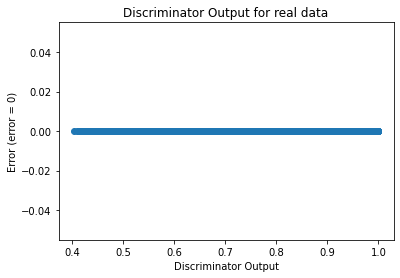

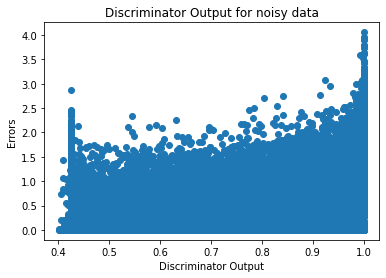

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
